This notebook contains some exploratory analysis of the data, as well as some more in-depth plotting of the various variables as my project takes shape.

I look at outliers, what defines success in my project problem, distributions of key variables and temporal visualizations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile

%matplotlib inline
plt.style.use('ggplot')

# Loading the data:

In [3]:
beers = pd.read_csv('Datasets/beers_data_cleaned.csv')

In [36]:
beers.head()

name              brewery beer_style  abv  date_added  available  \
0       Exalted  Thornbridge Brewery    Altbier  4.5  10/06/2016          1   
1          Leaf   Orbit Beers London    Altbier  6.2  03/12/2014          1   
2  Ctrl Alt Del                Wylam    Altbier  4.9  07/02/2016          1   
3         Hades        Ghost Brew Co    Altbier  4.5  16/07/2016          1   
4   The Altbier     Anspach & Hobday    Altbier  5.0  02/10/2015          1   

   num_ratings  rating                                          beer_desc  \
0          542    3.70                      Collaboration with Magic Rock   
1          783    3.67  Beechwood smoked malt meets a double altbier.\...   
2          318    3.65  12.4° Plato | OG 1050 | ABV 4.9%\n\nWylam & Le...   
3          228    3.62                                Dry Hopped Altbier.   
4          288    3.57                                                  0   

  beer_style_group  
0            Other  
1            Other  
2            Other  
3            Other  
4            Other

In [5]:
# Converting date_added to datetime:
beers['date_added'] =  pd.to_datetime(beers['date_added'])

In [38]:
beers.dtypes

name                        object
brewery                     object
beer_style                  object
abv                        float64
date_added          datetime64[ns]
available                    int64
num_ratings                  int64
rating                     float64
beer_desc                   object
beer_style_group            object
dtype: object

# Correlation Matrix:

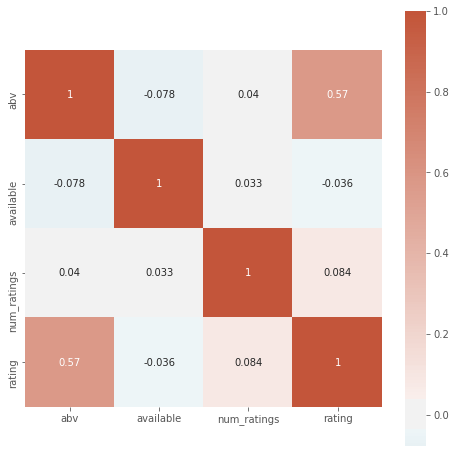

In [39]:
# source: https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
# source: https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

plt.figure(figsize=(8,8))

# calculate correlation matrix
corr = beers.corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), center = 0, square = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

- We can see above there appears to be a correlation between abv and overall rating, but very little between number of ratings or avilability with rating.
- Below I will look at both ABV and number of ratings in more detail to see how outliers may be impacting their correlation.

# Data Exploration through Plotting Figures:

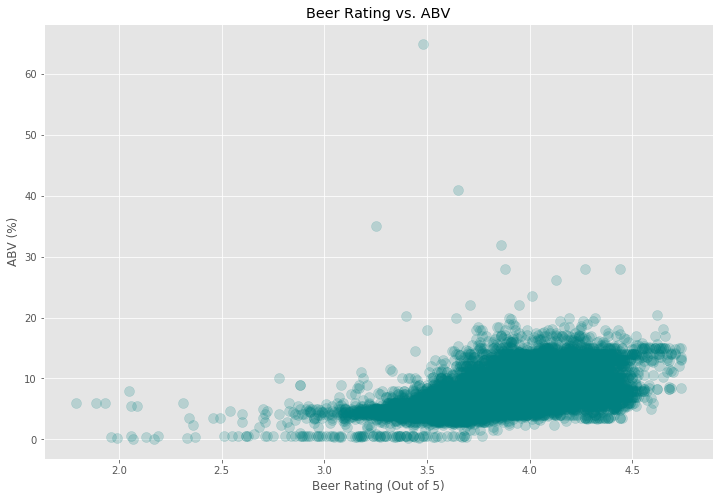

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(beers.rating, beers.abv, color = 'teal', s = 100, alpha = 0.2)

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('ABV (%)')
plt.title('Beer Rating vs. ABV')

plt.show()

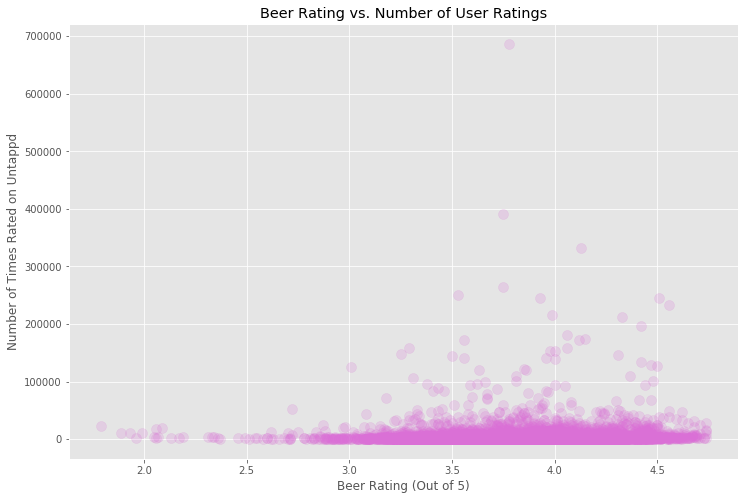

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(beers.rating, beers.num_ratings, color = 'orchid', s = 100, alpha = 0.2)

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('Number of Times Rated on Untappd')
plt.title('Beer Rating vs. Number of User Ratings')

plt.show()

- Outliers above are clearly obscuring the trend for both these variables, I will explore below how both look when these outliers are removed:

## Looking at Outliers in ABV and Number of Ratings:

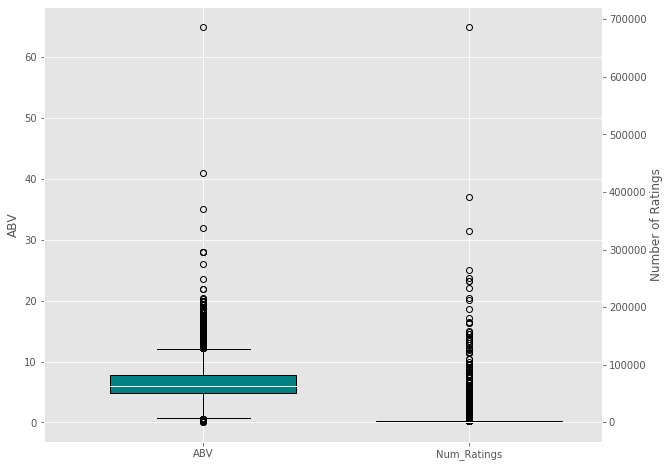

In [42]:
# source for boxplot props: https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color

fig, ax1  = plt.subplots(figsize=(10, 8))

props = dict(widths=0.7,patch_artist=True, medianprops=dict(color="mintcream"))
box1=ax1.boxplot(beers['abv'].values, positions=[0], **props, boxprops=dict(facecolor='teal'))

ax2 = ax1.twinx() # creates a twin axis sharing the x axis
box2=ax2.boxplot(beers[['num_ratings']].values,positions=[1], **props, boxprops=dict(facecolor='orchid'))

ax1.set_xticklabels(["ABV", "Num_Ratings"])
ax1.set_ylabel("ABV")
ax2.set_ylabel("Number of Ratings")
plt.grid(b=None)

plt.show()

### Largest ABV Outliers:

In [43]:
beers[beers['abv']>=30].sort_values(by=['abv'], ascending = False)

name              brewery  \
4816                Armageddon  Brewmeister Brewery   
4814        Sink The Bismarck!              BrewDog   
1509               Watt Dickie              BrewDog   
4813  Tactical Nuclear Penguin              BrewDog   

                        beer_style   abv date_added  available  num_ratings  \
4816         Freeze-Distilled Beer  65.0 2012-10-16          1          733   
4814         Freeze-Distilled Beer  41.0 2010-03-10          1        10606   
1509  Bock - Eisbock (Traditional)  35.0 2013-06-22          0         1543   
4813         Freeze-Distilled Beer  32.0 2010-08-21          1        12101   

      rating                                          beer_desc  \
4816    3.48  The world's strongest beer at 65%. Ingredients...   
4814    3.65  An unsettling development has arisen in mainla...   
1509    3.25  This is alchemy and apothecary. Fuelled by an ...   
4813    3.86  No Penguins were harmed in the making of this ...   

     beer_style_group  
4816            Other  
4814            Other  
1509             Bock  
4813            Other

- Here we can see some entries that are truly stretching the definition of the word beer, with the strongest abv beer registering at 65% - more alcholic that most spirits.

### Largest Number of Ratings Outliers:

In [44]:
beers[beers['num_ratings']>=300000].sort_values(by=['num_ratings'], ascending = False)

name               brewery         beer_style  abv  \
20331  Guinness Draught              Guinness  Stout - Irish Dry  4.2   
6321           Punk IPA               BrewDog     IPA - American  5.2   
20740   Breakfast Stout  Founders Brewing Co.    Stout - Oatmeal  8.3   

      date_added  available  num_ratings  rating  \
20331 2010-08-21          1       686999    3.78   
6321  2010-08-21          1       391092    3.75   
20740 2010-08-21          1       331934    4.13   

                                               beer_desc beer_style_group  
20331  Swirling clouds tumble as the storm begins to ...            Stout  
6321   Punk IPA is the beer that kick-started it. Thi...              IPA  
20740  The coffee lover’s consummate beer. Brewed wit...            Stout

- There are some beers here that are brewed by some of the largest breweries in the world and are well-established (e.g. Guinness), so it is not surprising the amount of ratings these have received.

- Both sets of outliers shown above can be seen to be true, and not anomalous values. However, to understand the distribution of the data when inspecting these variables with large outliers it makes sense to obscure them from that analysis.

### Creating new columns for outliers:

- Looking at the distribution of the ABV and number of ratings columns before deciding on a method to identify outliers.

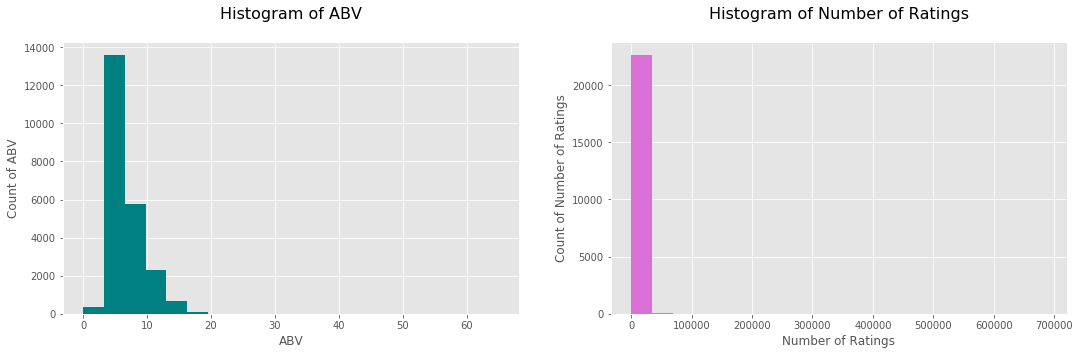

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

feature_cols = [beers.abv, beers.num_ratings]
names = ['ABV', 'Number of Ratings']
colors = ['teal', 'orchid']

for i in range(len(feature_cols)):
    ax[i].hist(feature_cols[i], color= colors[i], bins=20)
    ax[i].set_xlabel(names[i])
    ax[i].set_ylabel("Count of " + names[i])
    ax[i].set_title("Histogram of "+ names[i] +"\n", fontsize = (16))

plt.show()

- Since neither feature is normally distributed (see above), I will use the inter-quartile range, rather than the standard deviation, to identify outliers.
- I will calcuate outliers as values outside 1.5x the IQR.
- Source code for IQR: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

### Calculating IQR and Outliers for ABV:

In [47]:
# calculate interquartile range - 
abv_q25, abv_q75 = percentile(beers.abv, 25), percentile(beers.abv, 75)
abv_iqr = abv_q75 - abv_q25
print('ABV Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (abv_q25, abv_q75, abv_iqr))

ABV Percentiles: 25th = 4.900, 75th = 7.800, IQR = 2.900


In [48]:
abv_cut_off = abv_iqr * 1.5
abv_lower, abv_upper = max(abv_q25 - abv_cut_off,0), abv_q75 + abv_cut_off
print('ABV Cut-Offs: Lower = %.3f, Upper = %.3f' % (abv_lower, abv_upper))

ABV Cut-Offs: Lower = 0.550, Upper = 12.150


In [49]:
abv_outliers = [x for x in beers.abv if x < abv_lower or x > abv_upper]
print('Identified outliers: %d' % len(abv_outliers))

Identified outliers: 1266


In [50]:
beers['is_outlier_abv'] = np.where((beers['abv']>abv_upper) | (beers['abv']<abv_lower), True, False)

#### Scatterplot ABV - Excluding Outliers

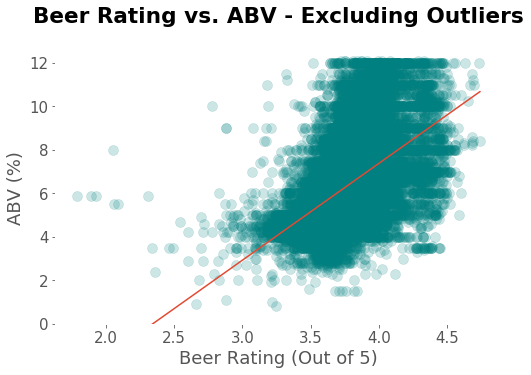

In [157]:
plt.figure(figsize=(8,5))
x = beers[beers['is_outlier_abv']==False].rating
y = beers[beers['is_outlier_abv']==False].abv

plt.scatter(x, y, color = 'teal', s = 100, alpha = 0.2)

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('ABV (%)')
plt.ylim(0, 12.5)
plt.title('Beer Rating vs. ABV - Excluding Outliers\n', fontweight = 'bold')

# using polyfit to plot a least squares polynomial line fit: 
# source: https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python/19069001#19069001
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.show()

- As expected, we see a generally positive trend between ABV and beer rating that was reflected in the earlier correlation matrix.

### Calculating IQR and Outliers for num_ratings:

In [52]:
# calculate interquartile range - 
nr_q25, nr_q75 = percentile(beers.num_ratings, 25), percentile(beers.num_ratings, 75)
nr_iqr = nr_q75 - nr_q25
print('Number of Ratings Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (nr_q25, nr_q75, nr_iqr))

Number of Ratings Percentiles: 25th = 252.000, 75th = 1238.750, IQR = 986.750


In [53]:
nr_cut_off = nr_iqr * 1.5
nr_lower, nr_upper = max(nr_q25 - nr_cut_off, 0), nr_q75 + nr_cut_off
print('Number of Ratings Cut-Offs: Lower = %.3f, Upper = %.3f' % (nr_lower, nr_upper))

Number of Ratings Cut-Offs: Lower = 0.000, Upper = 2718.875


In [54]:
nr_outliers = [x for x in beers.num_ratings if x < nr_lower or x > nr_upper]
print('Identified outliers: %d' % len(nr_outliers))

Identified outliers: 2674


In [55]:
beers['is_outlier_num_r'] = np.where((beers['num_ratings']>nr_upper) | (beers['num_ratings']<nr_lower), True, False)

#### Scatterplot - Num_ratings Excluding Outliers:

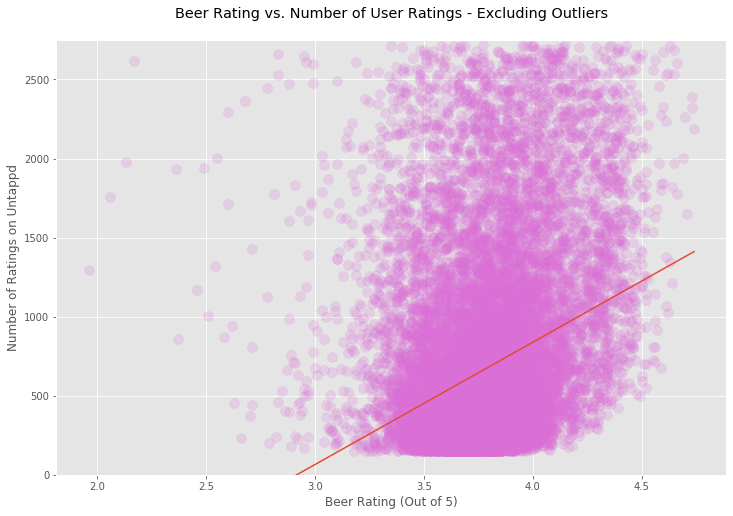

In [56]:
plt.figure(figsize=(12,8))
x = beers[beers['is_outlier_num_r']==False].rating
y = beers[beers['is_outlier_num_r']==False].num_ratings

plt.scatter(x, y, color = 'orchid', s = 100, alpha = 0.2)

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('Number of Ratings on Untappd')
plt.ylim(0, 2750)
plt.title('Beer Rating vs. Number of User Ratings - Excluding Outliers\n')

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.show()

- The trend is much less clear for number of ratings.
- I will concentrate more on ABV as a predictor of rating in this case as this report is not extensive and there appears to be a more positive correlation. This will be explored in more detail when I build a model to predict rating.

### Histograms Excluding Outliers:

#### ABV and Number of Ratings Histograms:

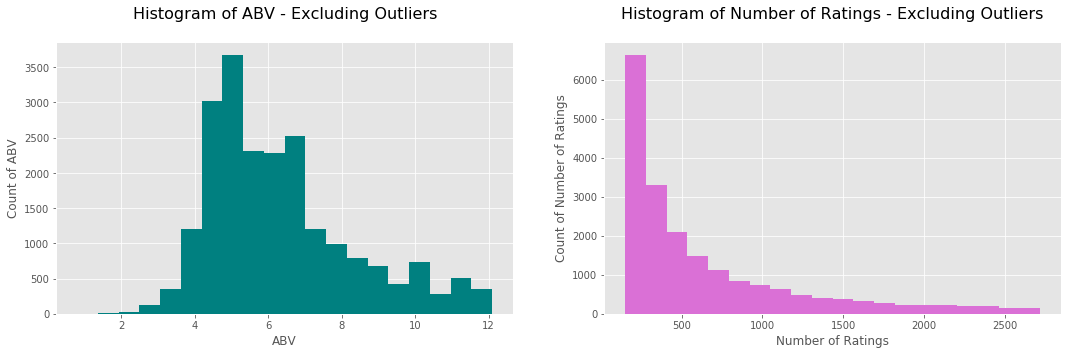

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

feature_cols = [beers[beers['is_outlier_abv']==False].abv, beers[beers['is_outlier_num_r']==False].num_ratings]
names = ['ABV', 'Number of Ratings']
colors = ['teal', 'orchid']

for i in range(len(feature_cols)):
    ax[i].hist(feature_cols[i], color= colors[i], bins=20)
    ax[i].set_xlabel(names[i])
    ax[i].set_ylabel("Count of " + names[i])
    ax[i].set_title("Histogram of "+ names[i] +" - Excluding Outliers\n", fontsize = (16))

plt.show()

- We see that ABV is shifted to look more normal without outliers, while number of ratings remains heavily right-skewed.

#### Ratings Histogram:

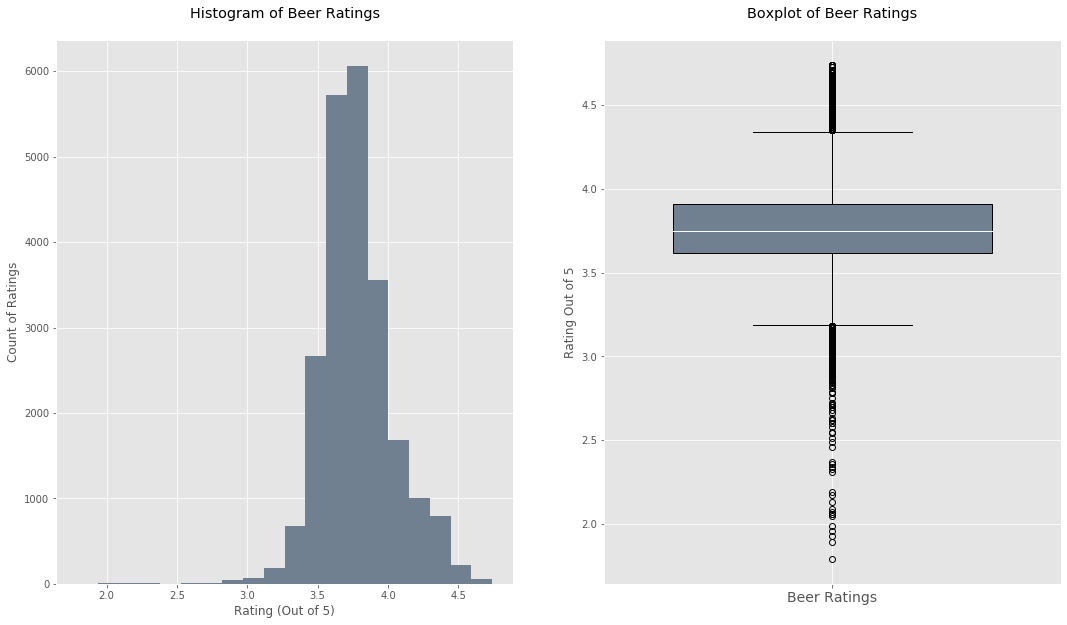

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,10))

ax[0].hist(beers.rating, bins =20, color = 'slategrey')
ax[1].boxplot(beers['rating'].values, positions=[0], **props, boxprops=dict(facecolor='slategrey'))


ax[0].set_xlabel('Rating (Out of 5)')
ax[0].set_ylabel('Count of Ratings')
ax[0].set_title('Histogram of Beer Ratings\n')
ax[1].set_xticklabels(["Beer Ratings"], fontsize = (14))
ax[1].set_ylabel('Rating Out of 5')
ax[1].set_title('Boxplot of Beer Ratings\n')

plt.show()

# Criteria for Determining the 'Success' of beer:

In [24]:
print("The Top 20% of beers in my dataframe are rated", beers.rating.quantile(0.80), "or higher")

The Top 20% of beers in my dataframe are rated 3.96 or higher


- The dataframe has been created by combining the top 50 beers in each category as listed on the website Untappd.
- I have decided that the cut-off for considering the beer to be a true success with consumers will be a rating of 3.96 or higher, roughly equating to the top 20% of ratings included within my dataframe.
- This corralates with my domain knowledge of the subject which suggests people generally rate a beer as amongst their favourites by scoring it a 4 or above.

# Exploring ABV vs "Success":

As shown above, there is a positive correlation between ABV and overall beer rating, but is there a "sweet spot", where beers in between certain ABV's are more likely to be succesful?

I will separate out the abv values, into 5 equal quantile bins, and then compare the comparative chance of a beer rating > 3.95/ 5 if it's in one of those bins:

In [142]:
# Using q cut to separate into 5 roughly equal quantile bins:

bin_labels = ['Under 4.7%', '4.7-5.5%', '5.5-6.5%', '6.5-8.5%', 'Over 8.5%']
beers['abv_bins'] = pd.qcut(beers.abv, q=[0, .2, .4, .6, .8, 1],
                           labels = bin_labels)

In [143]:
beers.head(3)

name              brewery beer_style  abv date_added  available  \
0       Exalted  Thornbridge Brewery    Altbier  4.5 2016-10-06          1   
1          Leaf   Orbit Beers London    Altbier  6.2 2014-03-12          1   
2  Ctrl Alt Del                Wylam    Altbier  4.9 2016-07-02          1   

   num_ratings  rating                                          beer_desc  \
0          542    3.70                      Collaboration with Magic Rock   
1          783    3.67  Beechwood smoked malt meets a double altbier.\...   
2          318    3.65  12.4° Plato | OG 1050 | ABV 4.9%\n\nWylam & Le...   

  beer_style_group  is_outlier_abv  is_outlier_num_r    abv_bins  
0            Other           False             False  Under 4.7%  
1            Other           False             False    5.5-6.5%  
2            Other           False             False    4.7-5.5%

In [144]:
# Creating a df with just beers that rate over 3.96 and counting how many are in each abv bin:
successful = beers[beers['rating']>= 3.96].abv_bins.value_counts().reset_index().rename(columns={'index': 'abv_bins',
                                                                                               'abv_bins': 'over_target'})

In [145]:
# Counting over numbers in each bin:
all_abv_count = beers.abv_bins.value_counts().reset_index().rename(columns={'index': 'abv_bins',
                                                                           'abv_bins': 'all_abvs'})

In [146]:
# Combining the two dataframes:
abv_bins_df = pd.merge(all_abv_count, successful, on='abv_bins', how='inner')

In [147]:
# Calculating % Chance of Success:
abv_bins_df['perc_successful'] = abv_bins_df.over_target/abv_bins_df.all_abvs*100

In [148]:
abv_bins_df = abv_bins_df.sort_values(by=['over_target'])

In [149]:
abv_bins_df.head()

abv_bins  all_abvs  over_target  perc_successful
1  Under 4.7%      4851          182         3.751804
0    4.7-5.5%      5001          387         7.738452
4    5.5-6.5%      4076          552        13.542689
2    6.5-8.5%      4595         1193        25.963003
3   Over 8.5%      4259         2333        54.778117

Plotting the above data:

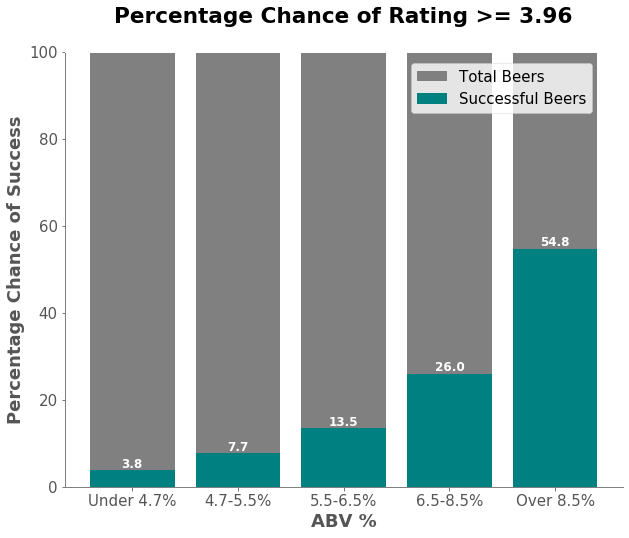

In [156]:
fig = plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.facecolor'] = 'white'
ax = fig.add_subplot(111)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

abvs = abv_bins_df.abv_bins.to_list()   # it is a categorical column
ind_abv = [x for x, _ in enumerate(abvs)]
succ_perc_abv = abv_bins_df.perc_successful
tote_abv = 100 - abv_bins_df.perc_successful

plt.bar(ind_abv, tote_abv, width=0.8, label='Total Beers', color='grey', bottom=succ_perc_abv)
plt.bar(ind_abv, succ_perc_abv, width=0.8, label='Successful Beers', color='teal')

for i, val in enumerate(succ_perc_abv.round(1)):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', 
             fontdict={'fontweight':600, 'size':12}, c= 'white')

plt.xticks(ind_abv, abvs)
plt.xlabel('ABV %', fontweight = 'bold')
plt.ylabel('Percentage Chance of Success', fontweight = 'bold')
plt.ylim(0, 100)
plt.legend(loc=(0.62,0.86), fontsize='medium')
plt.title('Percentage Chance of Rating >= 3.96\n', fontweight = 'bold')

plt.show()

- As you can see above, there is no gurantee of success with whatever beer you make, but a stronger beer has a much better chance of being successful.

# Exploring Beer Style vs "Success":

- Firstly creating a Scatterplot with Beer Styles Included to see any General Trends:

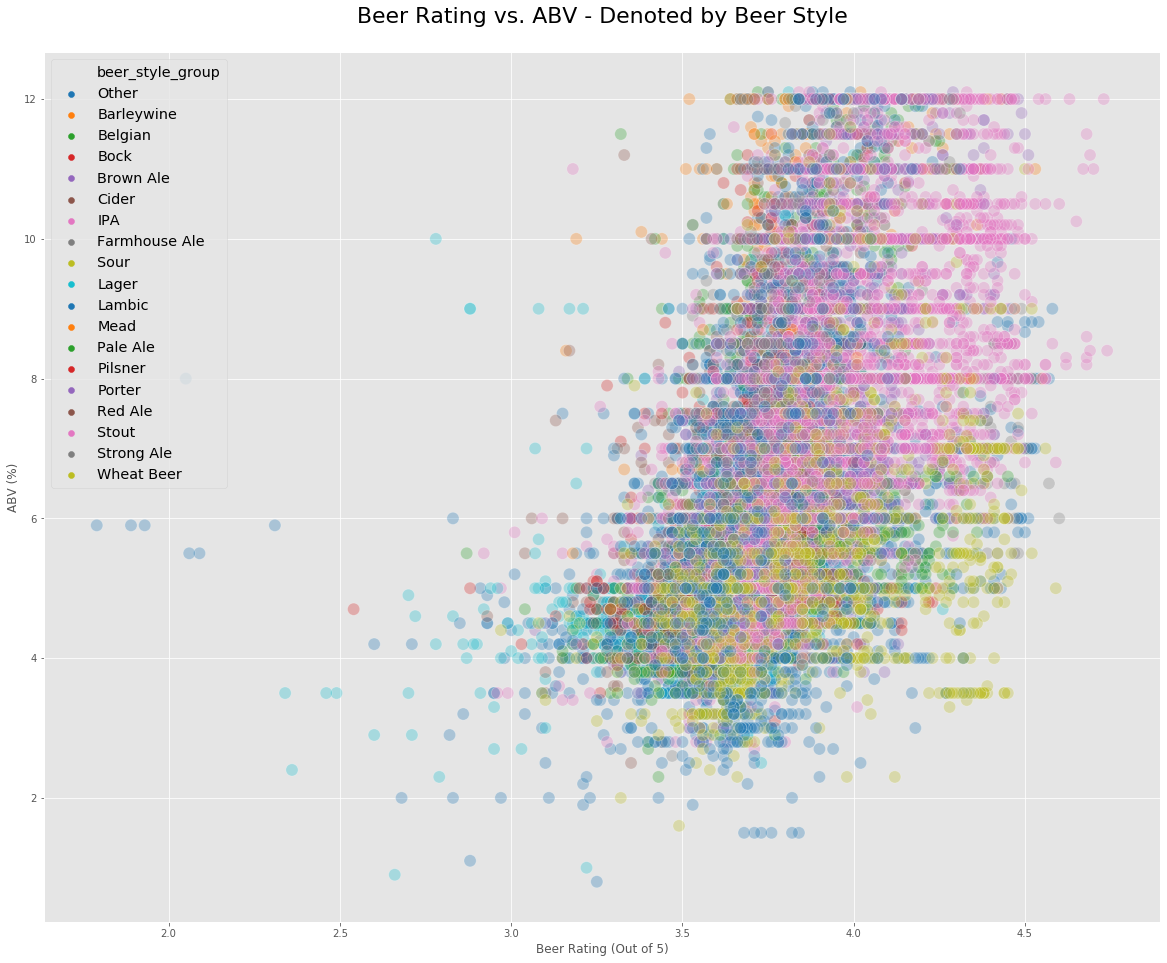

In [25]:
plt.figure(figsize=(20,16))

X = beers[beers['is_outlier_abv']==False].rating
Y = beers[beers['is_outlier_abv']==False].abv
Z = beers[beers['is_outlier_abv']==False].beer_style_group

sns.scatterplot(data = beers, x=X, y=Y, hue = Z, palette = "tab10", s=150, alpha = 0.3, edgecolor = 'white')

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('ABV (%)')
plt.title('Beer Rating vs. ABV - Denoted by Beer Style\n', fontsize= '22')
plt.legend(fontsize='x-large', title_fontsize='40')

plt.show()

- This graphic is very hard to analyse effectively as there is too much noise, so I will try different methods below.

## Looking at the same figure just for beers rated >=3.96 out of 5:

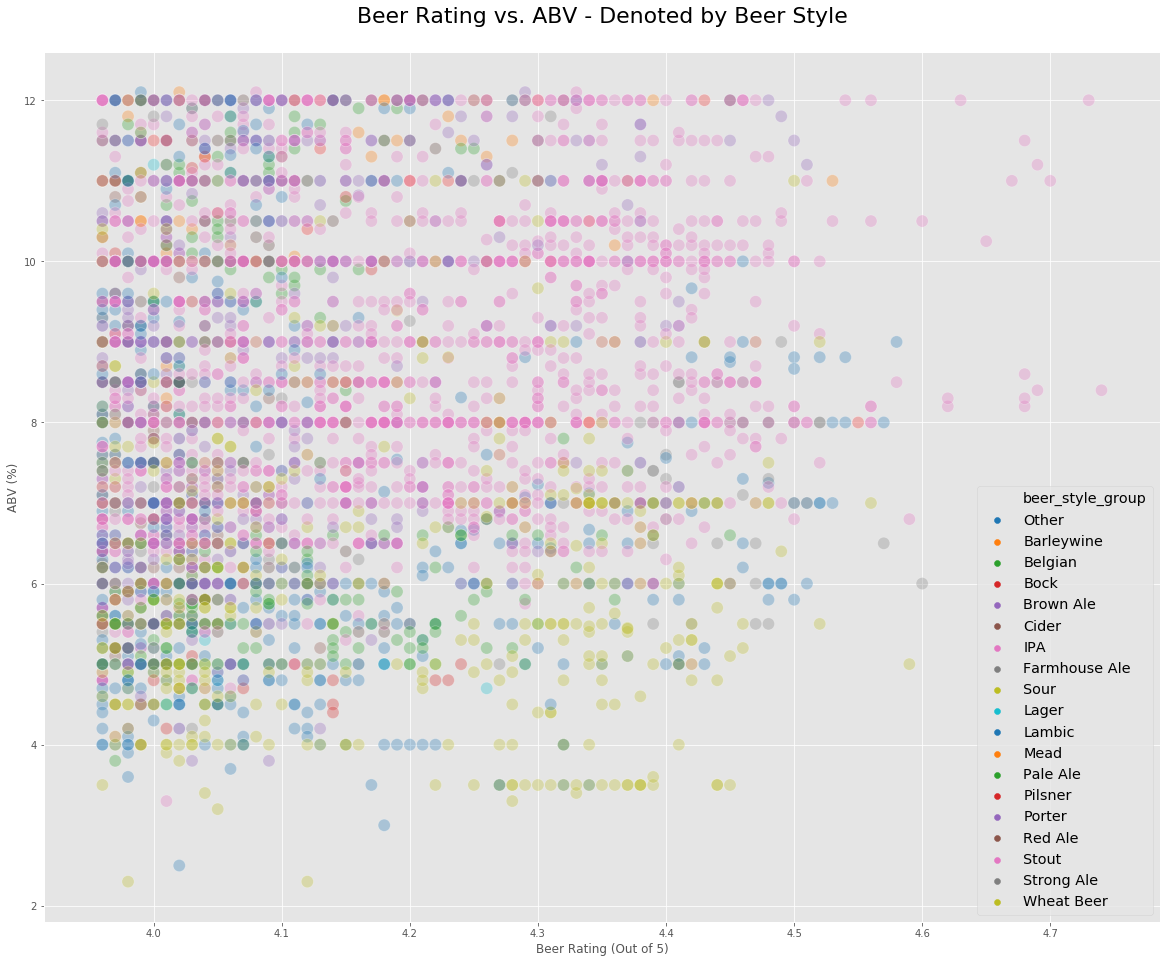

In [26]:
plt.figure(figsize=(20,16))

X = beers.loc[(beers['is_outlier_abv']==False) & (beers['rating']>=3.96)].rating
Y = beers[beers['is_outlier_abv']==False].abv
Z = beers[beers['is_outlier_abv']==False].beer_style_group

sns.scatterplot(data = beers, x=X, y=Y, hue = Z, palette = "tab10", s=150, alpha = 0.3, edgecolor = 'white')

plt.xlabel('Beer Rating (Out of 5)')
plt.ylabel('ABV (%)')
plt.title('Beer Rating vs. ABV - Denoted by Beer Style\n', fontsize= '22')
plt.legend(fontsize='x-large', title_fontsize='40')

plt.show()

- Again, even with just beers rated >=3.96 it is very hard to evaluate this graph effectively. Below I will aggegrate some metrics to provide a clearer view.

# Looking at the distribution of beers rated >= 3.96 out of 5:

In [27]:
len(beers[beers['rating']>= 3.96])

4647

- There are 4,647 beers rated 3.96 or better in our dataframe. 
- This represents around 20% of the data.
- I will take a look at whether any specific beer styles over_index to having a higher rating:

In [4]:
# Separating out just beers that rate over our threshold
over_target = beers[beers['rating']>= 3.96].beer_style_group.value_counts().reset_index().rename(columns={'index': 'styles'})

In [5]:
overall = beers.beer_style_group.value_counts().reset_index().rename(columns={'index': 'styles'})

In [6]:
# Making a df that includes a count of all beers of a particular style, and just successful ones.
success_ranking_type = pd.merge(overall, over_target, on='styles', how='inner')

In [7]:
# Calculating the percentage of each beer type that is over our threshold value:
success_ranking_type['perc_successful'] = success_ranking_type.beer_style_group_y/success_ranking_type.beer_style_group_x*100

In [8]:
success_ranking_type

styles  beer_style_group_x  beer_style_group_y  perc_successful
0           Other                5596                 555         9.917798
1             IPA                3663                1090        29.757030
2           Stout                2506                 942        37.589785
3           Lager                1615                  25         1.547988
4        Pale Ale                1441                 150        10.409438
5            Sour                1292                 434        33.591331
6          Porter                 990                 343        34.646465
7           Cider                 841                  49         5.826397
8         Red Ale                 622                  25         4.019293
9       Brown Ale                 593                  98        16.526138
10        Belgian                 587                 161        27.427598
11        Pilsner                 543                  18         3.314917
12  Farmhouse Ale                 515                 103        20.000000
13     Wheat Beer                 485                  70        14.432990
14           Mead                 358                 162        45.251397
15           Bock                 338                  32         9.467456
16     Barleywine                 310                 167        53.870968
17     Strong Ale                 245                  69        28.163265
18         Lambic                 242                 154        63.636364

## Bar Chart of Beers Rated 3.96 and Above, Compared to total beers in our Database:

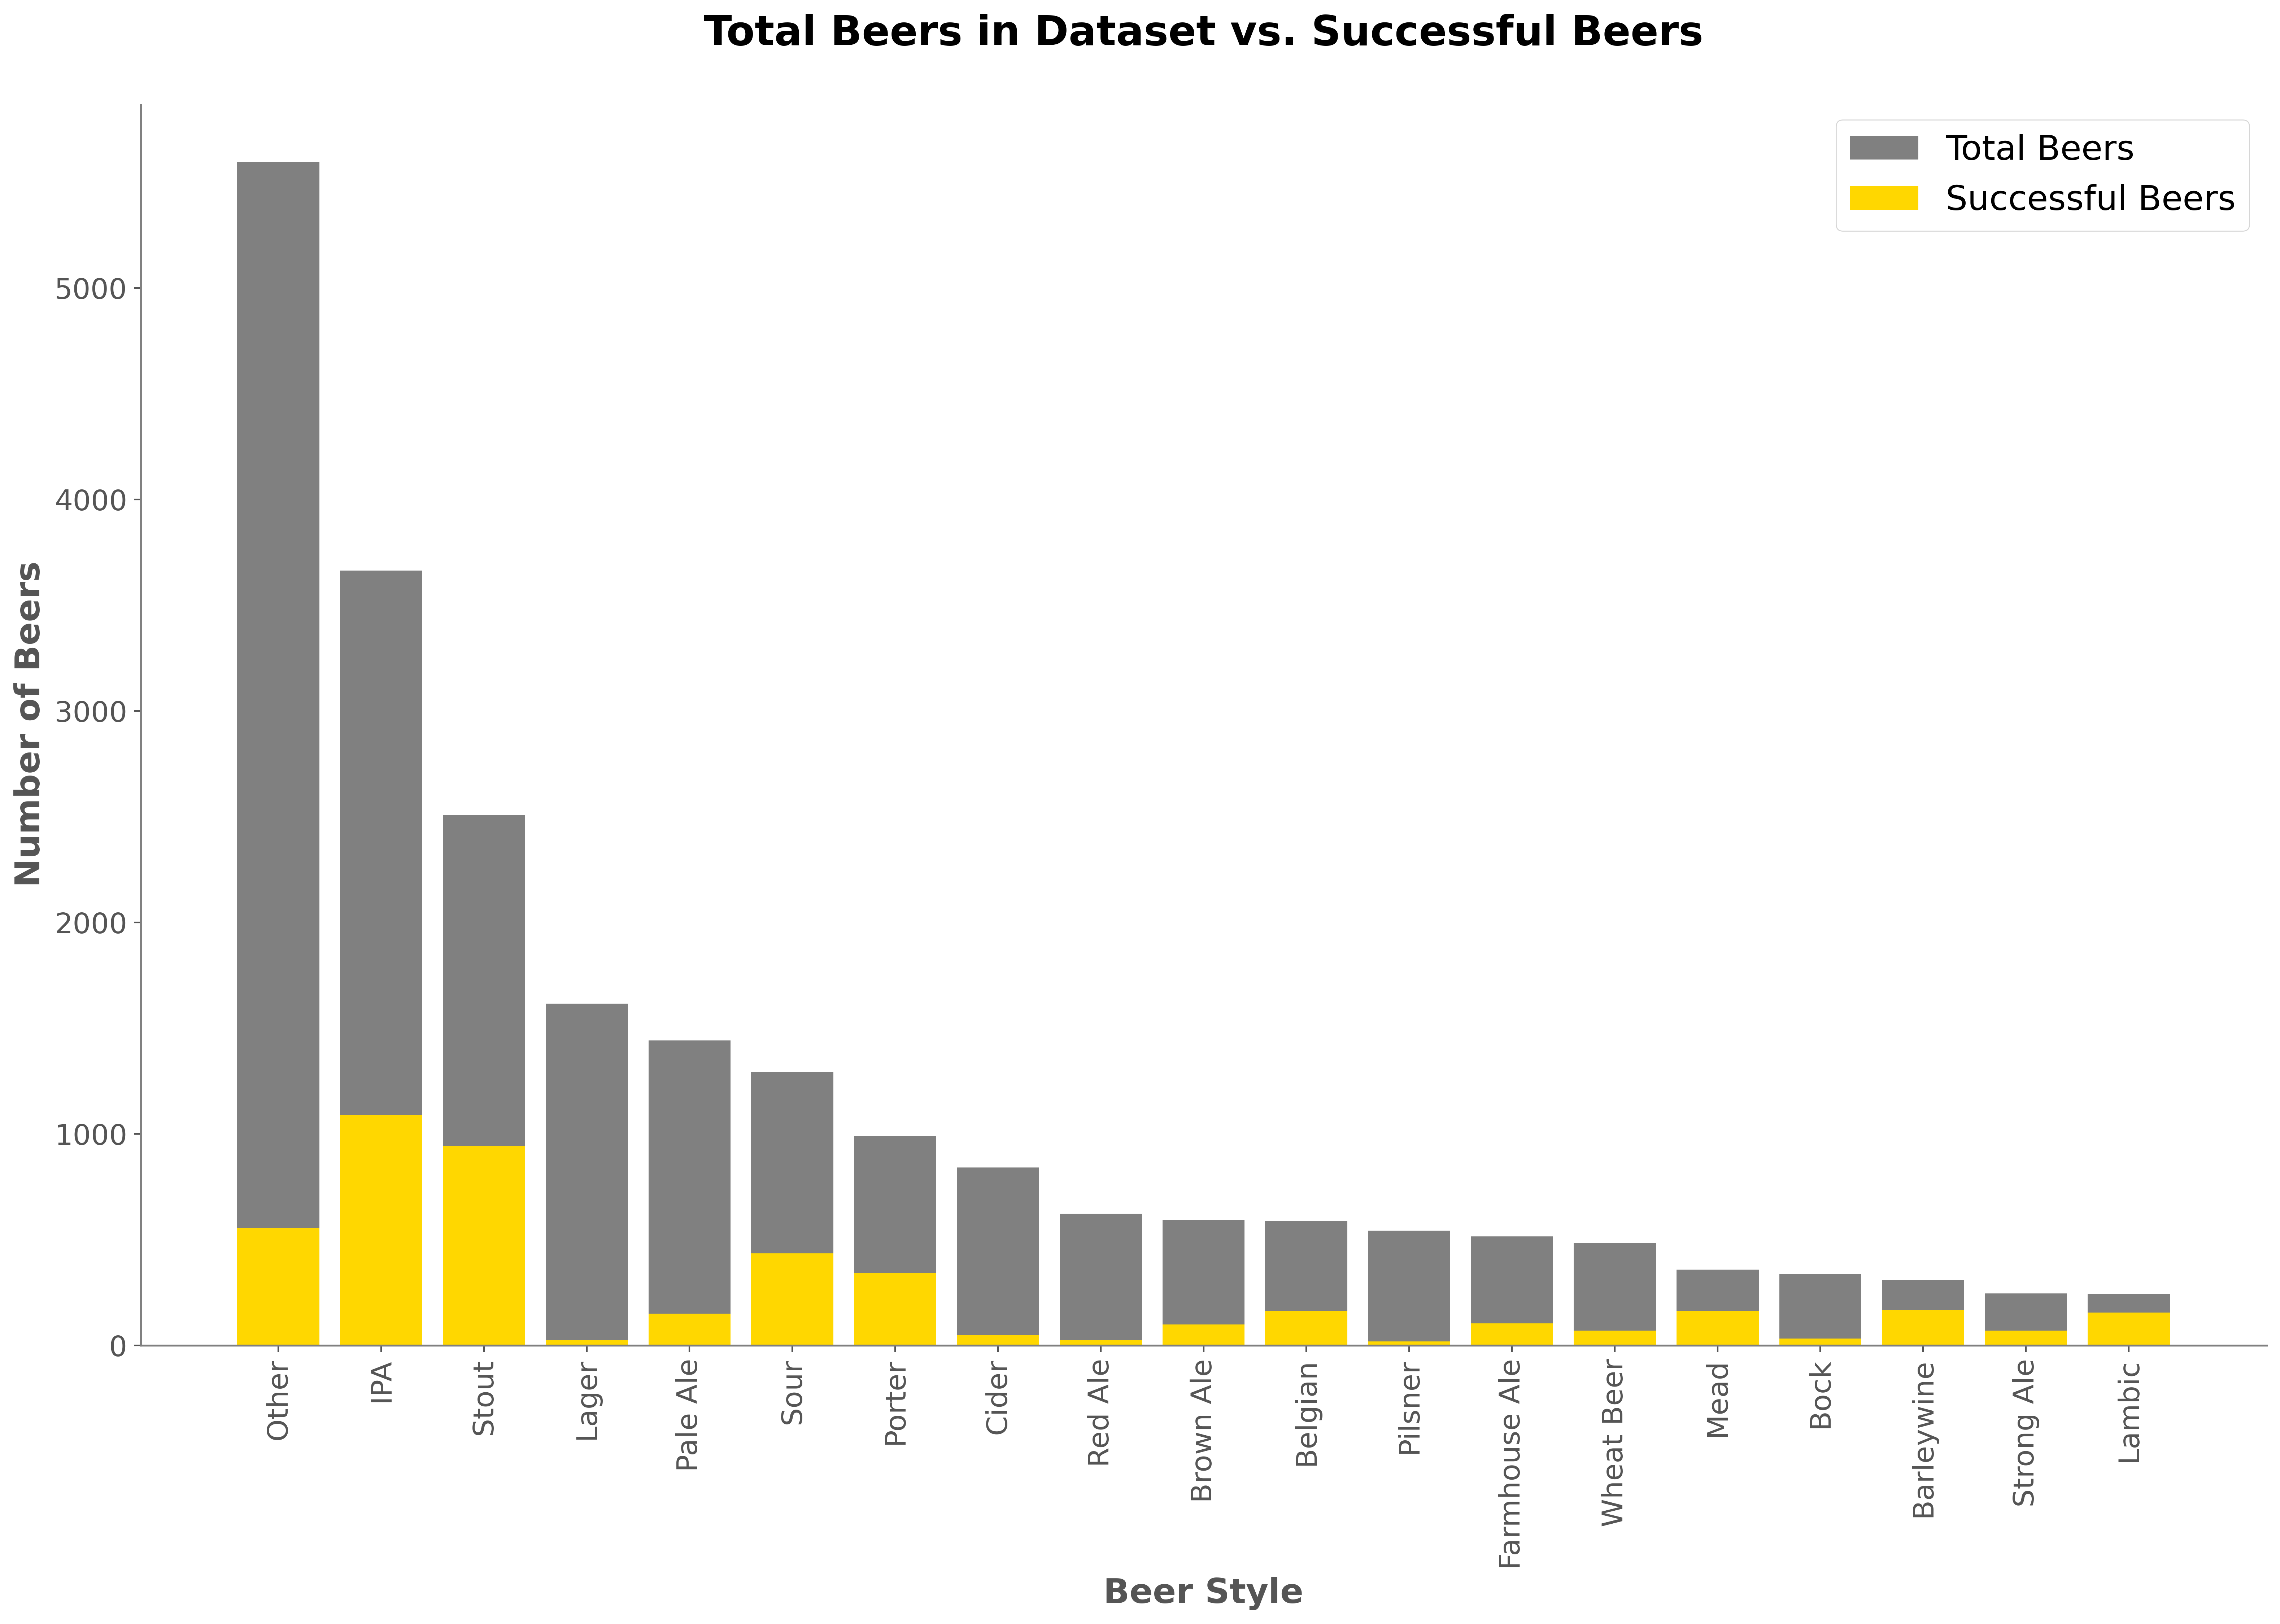

In [10]:
fig = plt.figure(figsize=(20,12), dpi=380)
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.facecolor'] = 'white'
ax = fig.add_subplot(111)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# source for bar chart code: https://benalexkeen.com/bar-charts-in-matplotlib/
styles = success_ranking_type.styles.to_list()
ind = [x for x, _ in enumerate(styles)]
succ = success_ranking_type.beer_style_group_y
tote = success_ranking_type.beer_style_group_x-success_ranking_type.beer_style_group_y

plt.bar(ind, tote, width=0.8, label='Total Beers', color='grey', bottom=succ)
plt.bar(ind, succ, width=0.8, label='Successful Beers', color='gold')

plt.xticks(ind, styles, rotation = 90)
plt.xlabel('Beer Style', fontweight = 'bold')
plt.ylabel('Number of Beers', fontweight = 'bold')
plt.legend(loc="upper right", fontsize='large')
plt.title('Total Beers in Dataset vs. Successful Beers\n', fontweight = 'bold')
plt.show()

- We can see above that some beers have vastly different chances of being successful. Lager is the 4th most popular beer on our list, however there appears to be a very small amount that rate >=3.96/5.00.
- To look into this trend in detail I will alter count into a percentage and plot below.

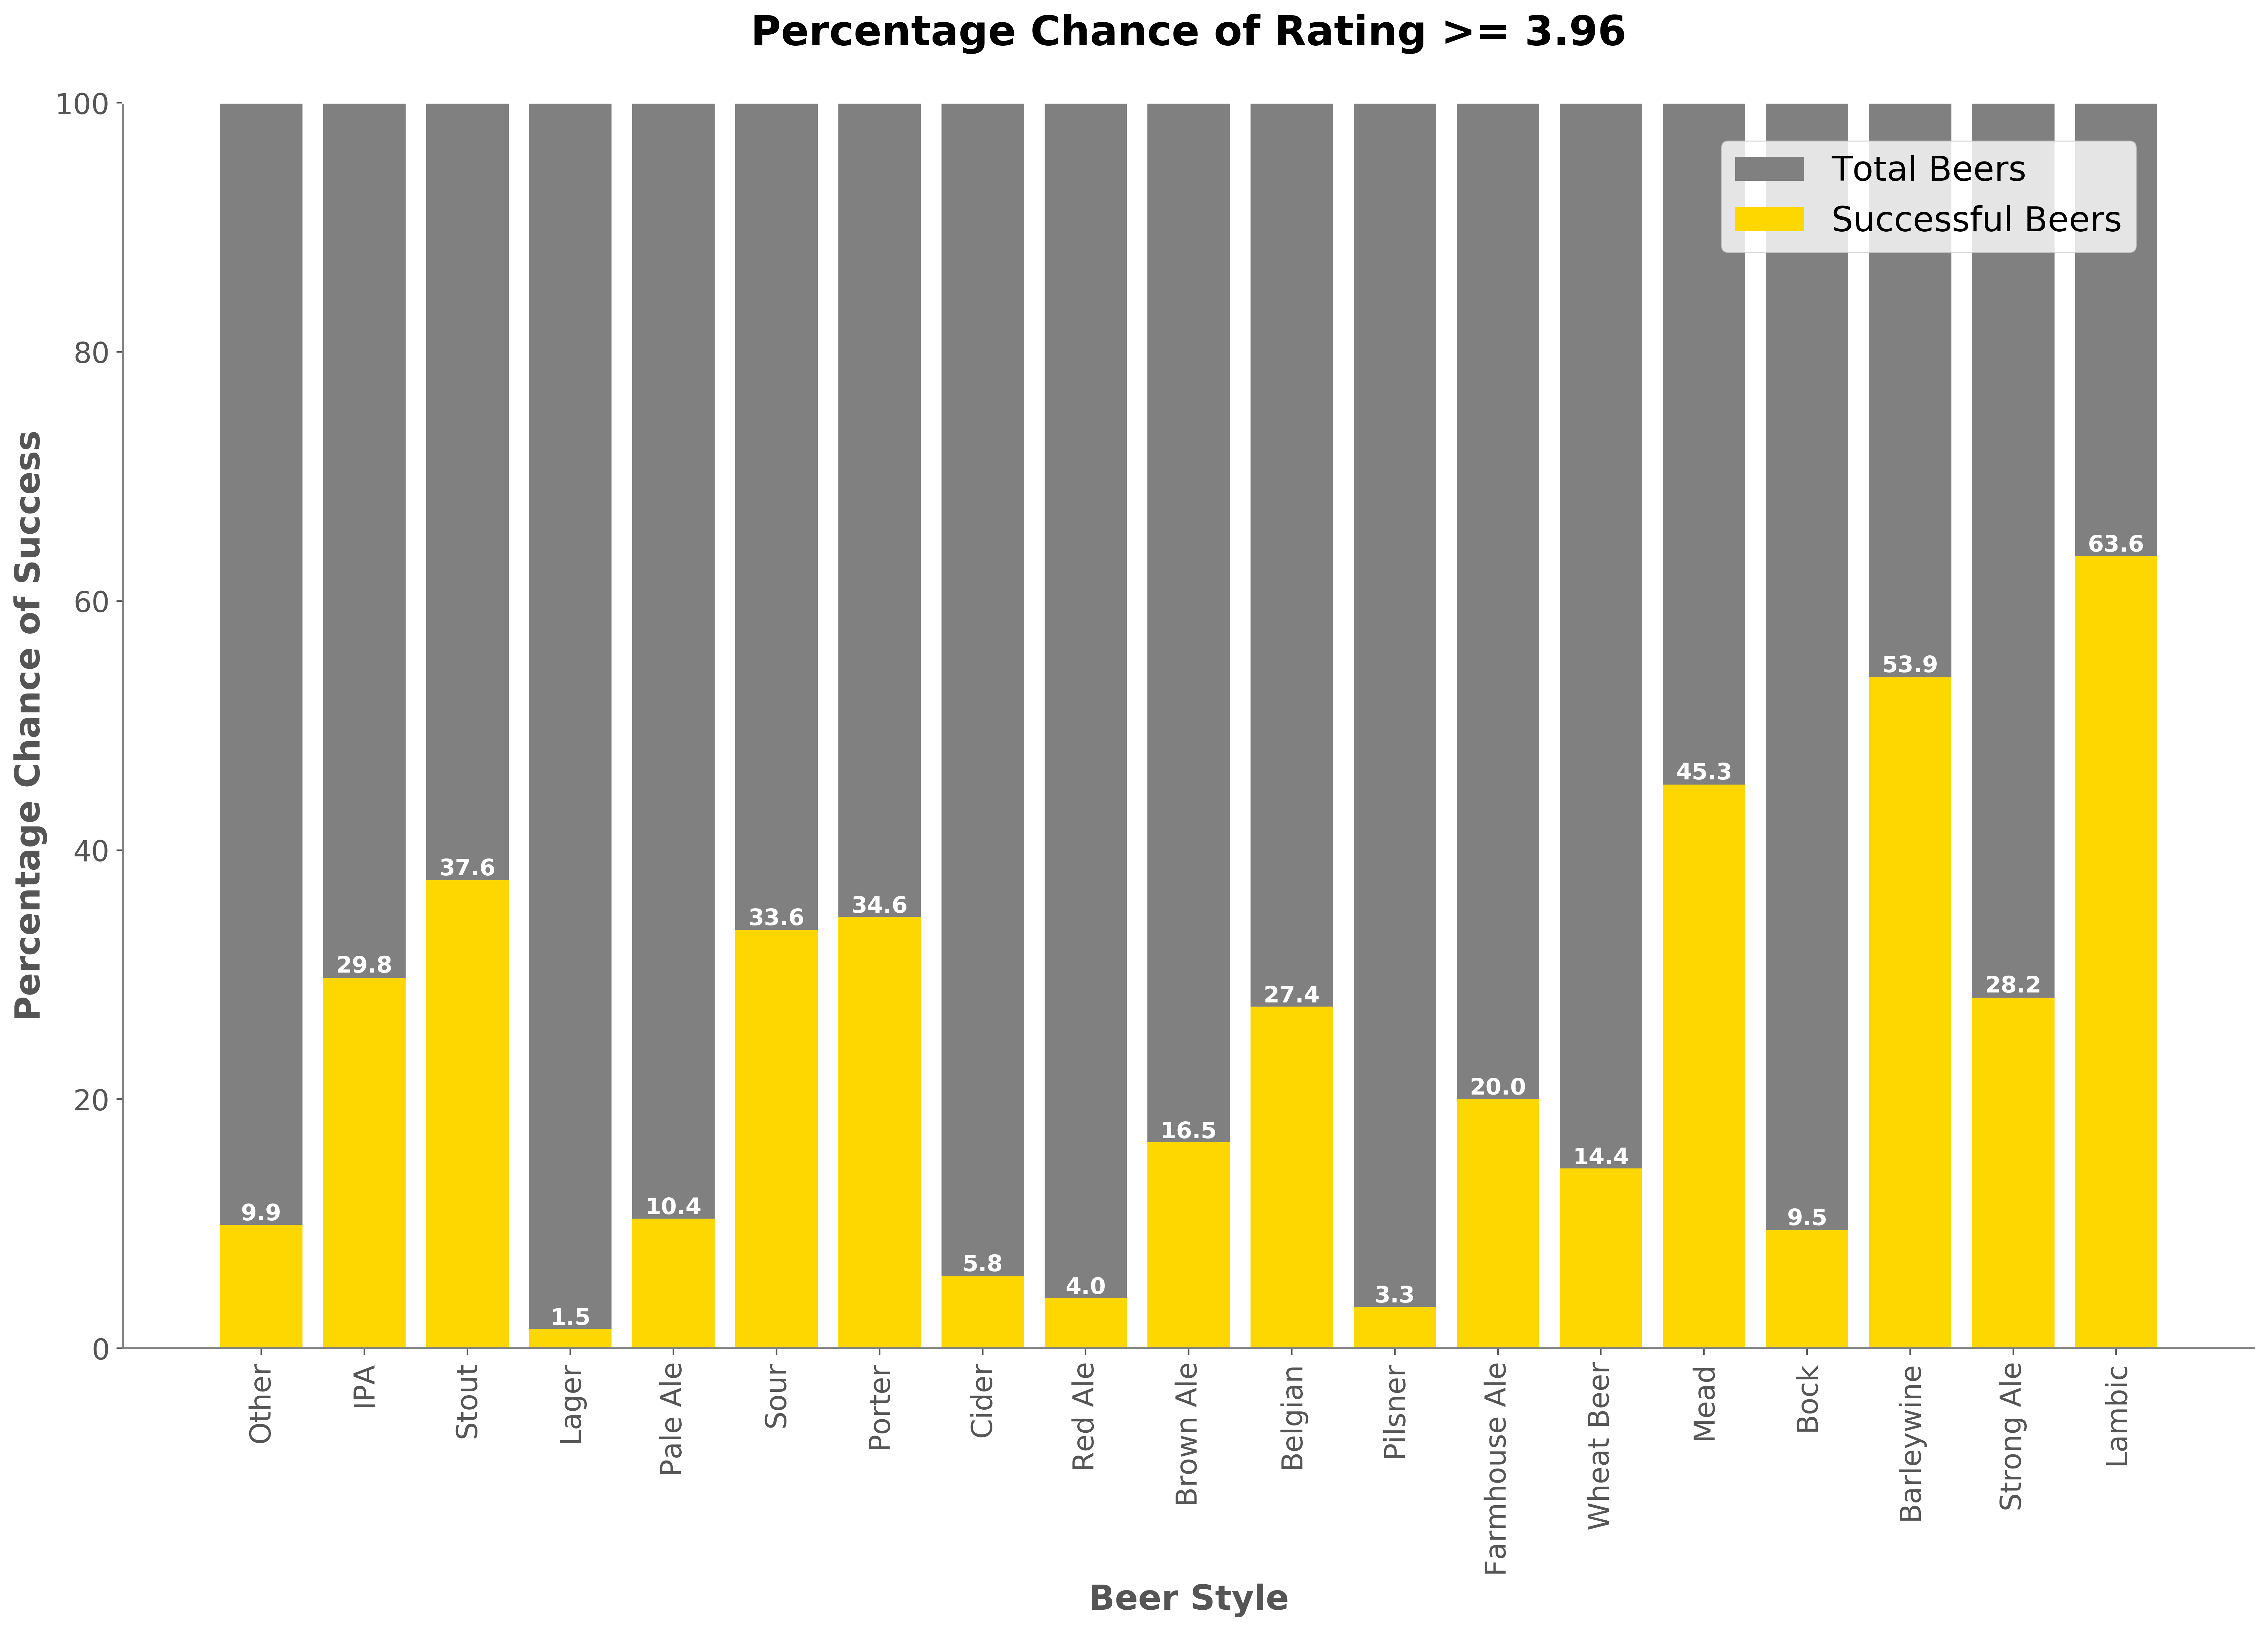

In [124]:
fig = plt.figure(figsize=(20,12), dpi = 400)
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.facecolor'] = 'white'
ax = fig.add_subplot(111)
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

styles = success_ranking_type.styles.to_list()
ind = [x for x, _ in enumerate(styles)]
succ_perc = success_ranking_type.perc_successful
tote = 100 - success_ranking_type.perc_successful

plt.bar(ind, tote, width=0.8, label='Total Beers', color='grey', bottom=succ_perc)
plt.bar(ind, succ_perc, width=0.8, label='Successful Beers', color='gold')

for i, val in enumerate(succ_perc.round(1)):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', 
             fontdict={'fontweight':600, 'size':12}, c= 'white')

plt.xticks(ind, styles, rotation = 90)
plt.xlabel('Beer Style', fontweight = 'bold')
plt.ylabel('Percentage Chance of Success', fontweight = 'bold')
plt.ylim(0, 100)
plt.legend(loc=(0.75,0.88), fontsize='large')
plt.title('Percentage Chance of Rating >= 3.96\n', fontweight = 'bold')

plt.show()

### High Level Takeaways:

- Here this trned we saw above is more clear, as Lambic has a 63.6% chance of rating >=3.96, whereas lager has a 1.5% chance.
- The beers being produced more frequently, i.e. those on the left of the chart, are likely easier to make or less costly, and may be generally more popular with consumers.
- The correct takeaway would not be for the big breweries to all start making Lambic beers, however if they shifted away from lager and towards IPA or Stout, which are clearly popular and more successful styles, then this could be an improved stratgey to remain relevant with consumers.
- Smaller breweries can concentrate on the right hand side of this chart and can dedicate their time and expertise to maximise their chances at making a successful beer for educated consumers by brewing Lambics, Meads and Barleywines. These beers may have a smaller target consumer market but are most likely to get a high rating and get these breweries noticed by consumers.

In [63]:
# Resetting plotting style:
plt.style.use('ggplot')

# Beer Popularity Over Time:

- Adding month and year columns to make grouping less noisy late:

In [6]:
beers['yr_month'] = beers['date_added'].dt.to_period('m')
beers['month'] = pd.DatetimeIndex(beers['date_added']).month
beers['year_rated'] = pd.DatetimeIndex(beers['date_added']).year

In [7]:
beers.head(3)

name              brewery beer_style  abv date_added  available  \
0       Exalted  Thornbridge Brewery    Altbier  4.5 2016-10-06          1   
1          Leaf   Orbit Beers London    Altbier  6.2 2014-03-12          1   
2  Ctrl Alt Del                Wylam    Altbier  4.9 2016-07-02          1   

   num_ratings  rating                                          beer_desc  \
0          542    3.70                      Collaboration with Magic Rock   
1          783    3.67  Beechwood smoked malt meets a double altbier.\...   
2          318    3.65  12.4° Plato | OG 1050 | ABV 4.9%\n\nWylam & Le...   

  beer_style_group yr_month  month  year_rated  
0            Other  2016-10     10        2016  
1            Other  2014-03      3        2014  
2            Other  2016-07      7        2016

In [8]:
time_series = beers.groupby(['yr_month', 'beer_style_group'])["rating"].mean().reset_index(name = 'av_rating')

In [9]:
time_series.head(3)

yr_month beer_style_group  av_rating
0  2010-01             Bock   3.660000
1  2010-01            Lager   3.080000
2  2010-01            Other   3.658571

In [10]:
ts = time_series.pivot(index="yr_month", columns="beer_style_group", values="av_rating")

In [11]:
ts.head(3)

beer_style_group  Barleywine  Belgian  Bock  Brown Ale  Cider  Farmhouse Ale  \
yr_month                                                                       
2010-01                  NaN      NaN  3.66        NaN    NaN            NaN   
2010-02                  NaN     3.89   NaN        4.0    NaN            NaN   
2010-03                  NaN      NaN   NaN        NaN    NaN            NaN   

beer_style_group    IPA  Lager  Lambic  Mead     Other  Pale Ale  Pilsner  \
yr_month                                                                    
2010-01             NaN   3.08     NaN   NaN  3.658571      4.28      NaN   
2010-02             NaN   2.86     NaN   NaN  3.580000      3.45      NaN   
2010-03           3.965   2.56     NaN   NaN  3.423333       NaN     3.34   

beer_style_group  Porter  Red Ale  Sour  Stout  Strong Ale  Wheat Beer  
yr_month                                                                
2010-01              NaN      NaN   NaN   3.50         NaN        3.89  
2010-02              NaN      NaN   NaN    NaN         NaN         NaN  
2010-03              NaN     3.43   NaN   3.99         4.2         NaN

## Monthly Average Rating by Beer Style:

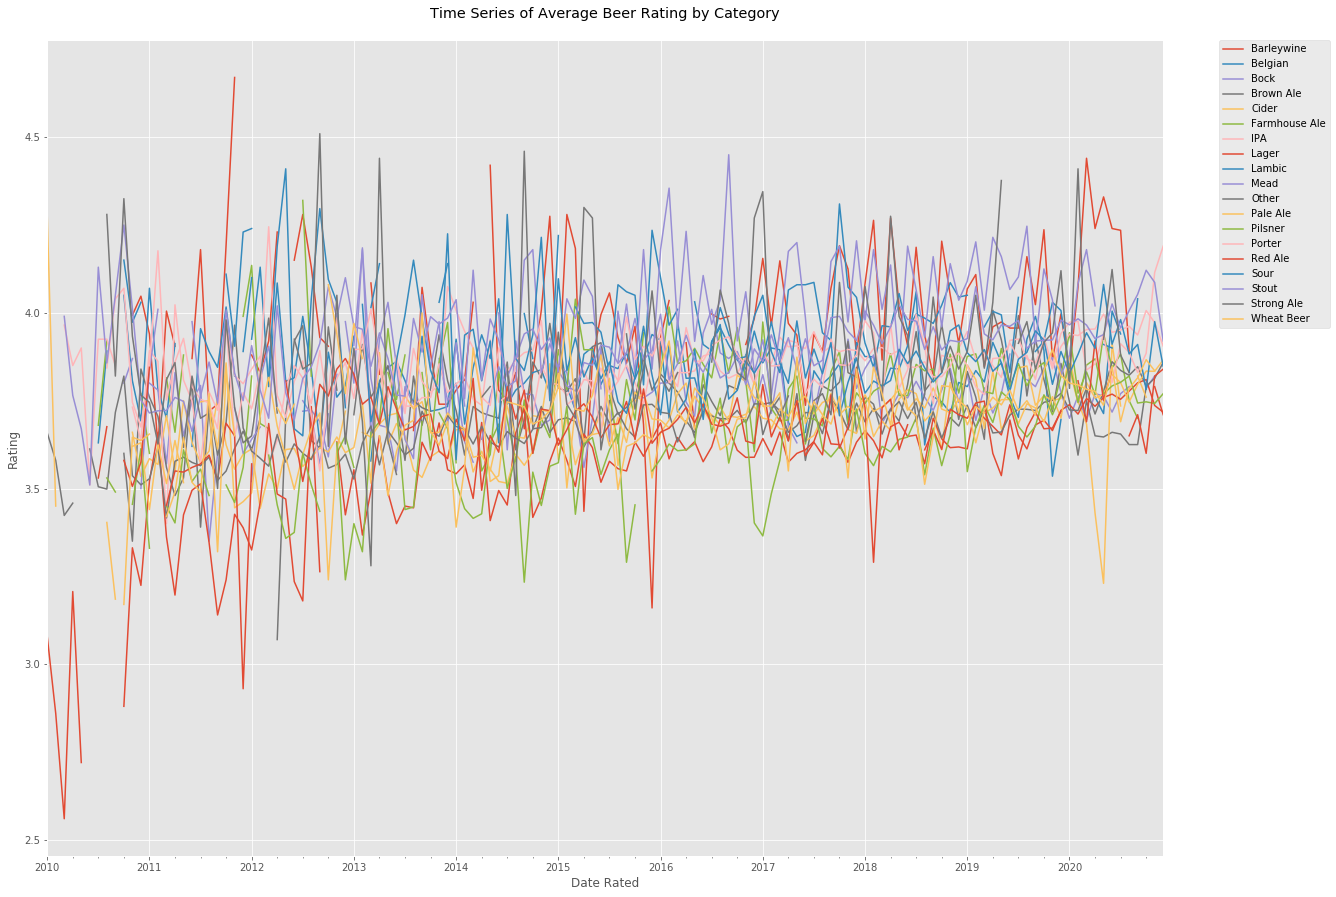

In [329]:
plt.rcParams["figure.figsize"] = [20,15]

time_series.pivot(index="yr_month", columns="beer_style_group", values="av_rating").plot();

plt.xlabel('Date Rated')
plt.ylabel('Rating')
plt.title('Time Series of Average Beer Rating by Category\n')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

- Like the graphs above, when all beer styles are used it's very hard to determine general trends from the noise.

In [264]:
time_series_yrs.head()

year_rated beer_style_group  av_rating
0       2010       Barleywine   4.037500
1       2010          Belgian   3.815455
2       2010             Bock   3.796667
3       2010        Brown Ale   3.703636
4       2010            Cider   3.496000

## Yearly Average Rating by Beer Style:

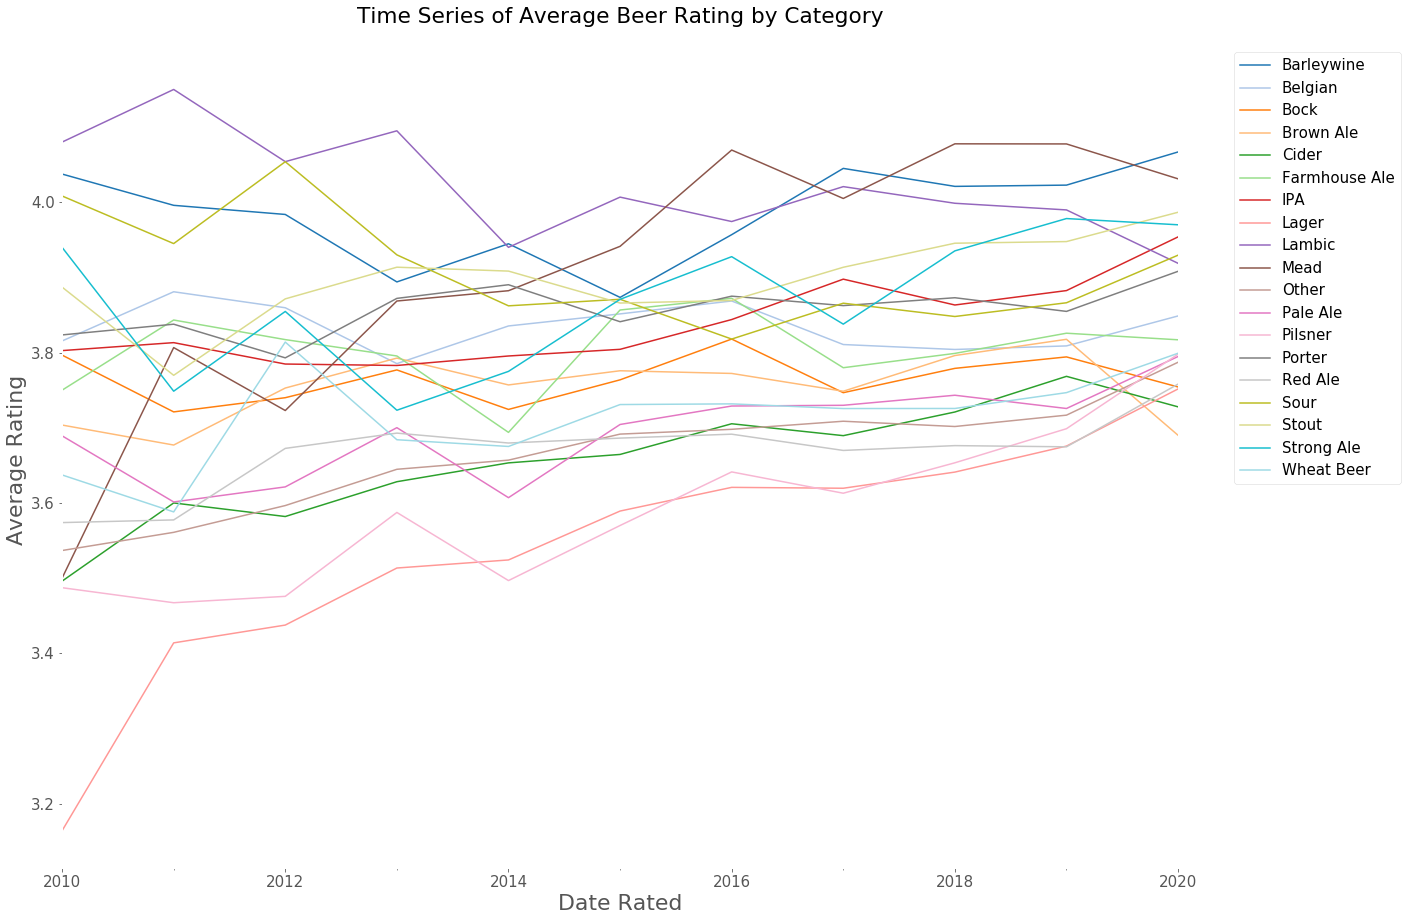

In [258]:
#fig = plt.figure(figsize=(20,12))
plt.rcParams["figure.figsize"] = [20,15]
plt.rcParams.update({'font.size': 15})
plt.rcParams['axes.facecolor'] = 'white'
# ax = fig.add_subplot(111)
# ax.spines['bottom'].set_color('grey')
# ax.spines['left'].set_color('grey')

time_series_yrs.pivot(index="year_rated", columns="beer_style_group", values="av_rating").plot(cmap = 'tab20');

plt.xlabel('Date Rated')
plt.ylabel('Average Rating')
plt.title('Time Series of Average Beer Rating by Category\n')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

- We can see some styles move up in average rating over time (such as Mead - Brown).
- However, a lot of beers ratings have stayed relatively stable over time.
- This likely shows that consumers tastes for individual beer styles has not changed that much over time, and some are just generally more likely to get a higher rating from consumers - this will likely make beer style an important predictor in our machine learning model.
- Generally we can see here that ratings are increasing over time. This may reflect the increase importance put by brewers now on taste as a differentiator, and generally could refelect an increasing competitiveness within the industry.

## Plotting Beers Added Over Time:

In [33]:
time_df = beers.yr_month.value_counts().reset_index(name='freq').rename(columns={'index': 'date'})

In [34]:
time_df= time_df.sort_values(by='date')
time_df.set_index('date',inplace=True,drop=True)

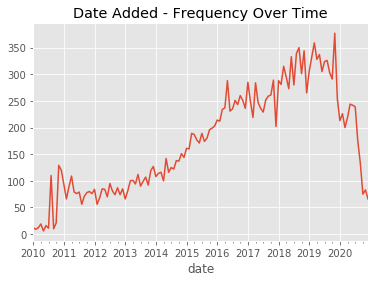

In [35]:
time_df.plot(legend=False)
plt.title('Date Added - Frequency Over Time')

plt.show()

- This plot reflects the increased popularity of craft beer over time, and of the Untappd app itself as more consumers are rating beers each year.
- We can also see the impact of Covid in the sharp dropp-off of beers added to the platform in 2020.

## Number of Ratings Over Time:

- Number of ratings corrresponds to the amount of ratings a beer has received since it was uploaded to the Untappd website.

- As such, when the site first started collecting data in 2010, there were a large number of beers added into the database in 2010. 
    - An example of this is Guiness was added to Untappd in 2010, but was first brewed in 1759.


In [387]:
beers.head(3)

name              brewery beer_style  abv date_added  available  \
0       Exalted  Thornbridge Brewery    Altbier  4.5 2016-10-06          1   
1          Leaf   Orbit Beers London    Altbier  6.2 2014-03-12          1   
2  Ctrl Alt Del                Wylam    Altbier  4.9 2016-07-02          1   

   num_ratings  rating                                          beer_desc  \
0          542    3.70                      Collaboration with Magic Rock   
1          783    3.67  Beechwood smoked malt meets a double altbier.\...   
2          318    3.65  12.4° Plato | OG 1050 | ABV 4.9%\n\nWylam & Le...   

  beer_style_group  is_outlier_abv  is_outlier_num_r yr_month  month  \
0            Other           False             False  2016-10     10   
1            Other           False             False  2014-03      3   
2            Other           False             False  2016-07      7   

   year_rated  
0        2016  
1        2014  
2        2016

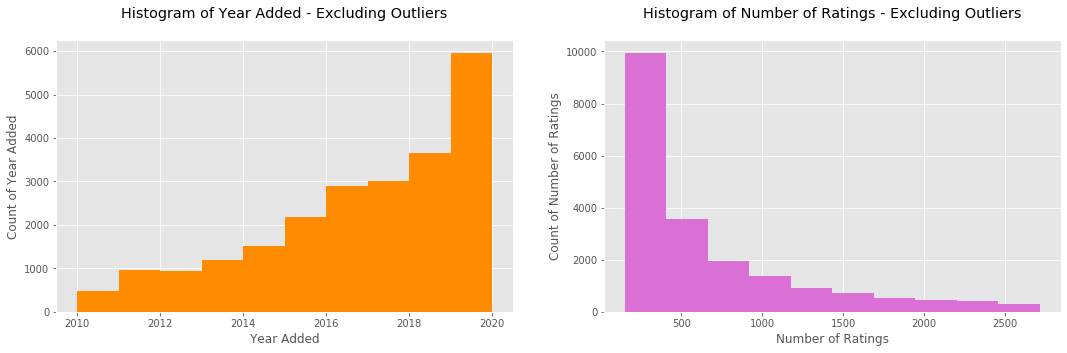

In [392]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

feature_cols = [beers.year_rated, beers[beers['is_outlier_num_r']==False].num_ratings]
names = ['Year Added', 'Number of Ratings']
colors = ['darkorange', 'orchid']

for i in range(len(feature_cols)):
    ax[i].hist(feature_cols[i], color= colors[i], bins=10)
    ax[i].set_xlabel(names[i])
    ax[i].set_ylabel("Count of " + names[i])
    ax[i].set_title("Histogram of "+ names[i] +" - Excluding Outliers\n")

plt.show()

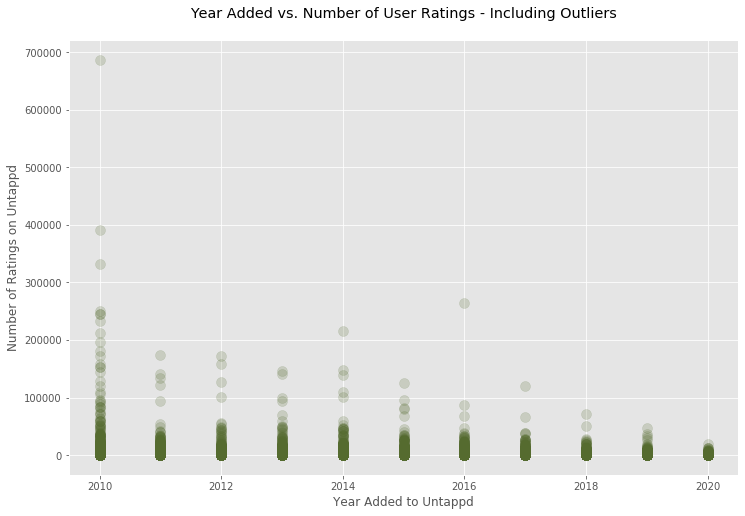

In [401]:
plt.figure(figsize=(12,8))
x = beers.year_rated
y = beers.num_ratings

plt.scatter(x, y, color = 'darkolivegreen', s = 100, alpha = 0.2)

plt.xlabel('Year Added to Untappd')
plt.ylabel('Number of Ratings on Untappd')
plt.title('Year Added vs. Number of User Ratings - Including Outliers\n')

#plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.show()

## Number of Ratings Over Time:

- This is the number of ratings the beer has received since it was added to the platform, as you can see below, there were some added in 2010 (like Guiness) that have had considerably more ratings than subseqent beers:

In [13]:
ratings_df = beers[['num_ratings', 'yr_month']]

In [14]:
ratings_df = ratings_df.groupby(['yr_month'])["num_ratings"].sum().reset_index(name = 'num_ratings')
ratings_df= ratings_df.sort_values(by='yr_month')
ratings_df.head(3)

yr_month  num_ratings
0  2010-01       227169
1  2010-02        53457
2  2010-03        37555

In [15]:
time_series_ratings = ratings_df.set_index('yr_month',drop=True)

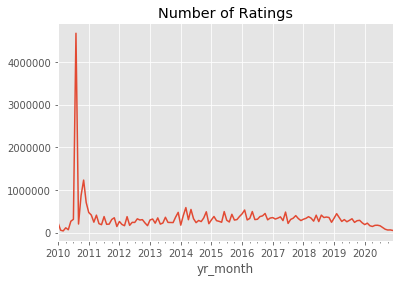

In [16]:
time_series_ratings.plot(legend=False)
plt.title('Number of Ratings')

plt.show()

## Looking at 2011 Onwards:

In [18]:
ts_ratings_after_2011 = ratings_df[(ratings_df['yr_month']>'2011') & 
                                    (ratings_df['yr_month']<'2020')].set_index('yr_month',drop=True)

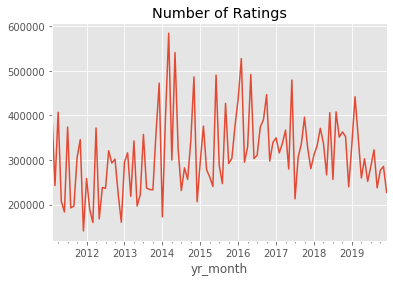

In [19]:
ts_ratings_after_2011.plot(legend=False)
plt.title('Number of Ratings')

plt.show()

- Exluding 2010 and 2011, when outliers like Guiness were added, the number of ratings on Untappd looks much more consistent.
- Again, this variable seems less important than ABV or Beer style and so I have focused less on number of ratings as a predictor of beer rating in this report.

In [21]:
len(beers[beers['yr_month']<'2011'])

475

In [22]:
beers[beers['yr_month']<'2011'].num_ratings.sum()

8736927

In [23]:
len(beers[beers['yr_month']>'2020'])

1902

In [24]:
beers[beers['yr_month']>'2020'].num_ratings.sum()

1380027

# Brewery - Prolific or not?


In [25]:
brewery_df = beers.brewery.value_counts().reset_index()

In [27]:
brewery_df.head()

index  brewery
0                BrewDog      491
1    Cloudwater Brew Co.      348
2          Northern Monk      197
3       Polly's Brew Co.      196
4  Tiny Rebel Brewing Co      192

In [28]:
print("The top 1 Percent of Breweries have > %d beers rated" % (brewery_df.brewery.quantile(0.99)))
print("The top 20 Percent of Breweries have > %d beers rated" % (brewery_df.brewery.quantile(0.8)))

The top 1 Percent of Breweries have > 59 beers rated
The top 20 Percent of Breweries have > 6 beers rated


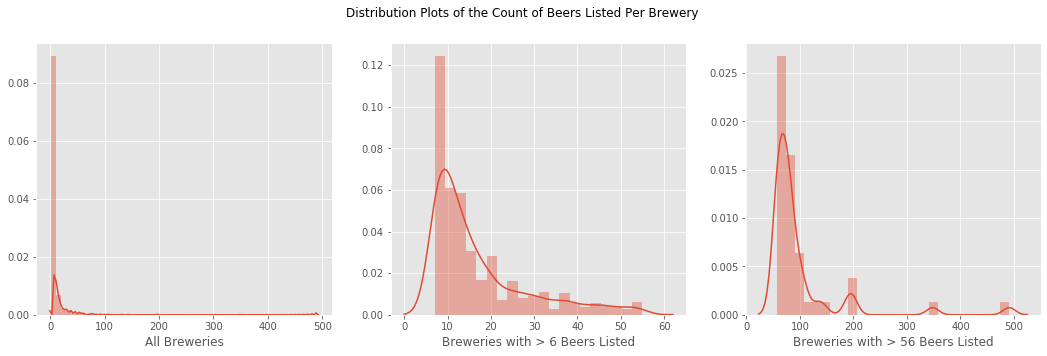

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

sns.distplot(brewery_df.brewery, ax = ax[0])
sns.distplot(brewery_df[(brewery_df['brewery']>6) & (brewery_df['brewery']<56)].brewery, ax= ax[1])
sns.distplot(brewery_df[brewery_df['brewery']>56].brewery, ax= ax[2])

ax[0].set_xlabel("All Breweries")
ax[1].set_xlabel("Breweries with > 6 Beers Listed")
ax[2].set_xlabel("Breweries with > 56 Beers Listed")
plt.suptitle('Distribution Plots of the Count of Beers Listed Per Brewery')
plt.show()

- Some breweries are clearly more prolific than others in making and having beers rated on Untappd.
- It is outside the scope of my project, but it could be interesting to add a dimension to this dataset in future work to reflect the output of each brewery and how that impacts the overall rating of the beers they produce over time - i.e. as the brewery gets more prolific do it's beer generally become lower quality?